# Heart Disease Dataset


In [126]:
# import basic libraries
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Purples_r")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [127]:
# import data into dataframe
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [128]:
df.shape

(303, 14)

## Data Cleaning


In [129]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Most of the columns have names that don't make intuitive sense to me as I am not familiar which the cardiovascular system and heart diseases. As a result of this, I will be renaming the columns to names that make more sense to me.


In [130]:
columns = {"cp": "chest_pain_type",
           "trestbps": "rest_bp",
           "chol": "cholesterol",
           "fbs": "fasting_blood_sugar",
           "restecg": "rest_ecg",
           "thalach": "max_heart_rate",
           "exang": "exercise_angina",
           "oldpeak": "exercise_st_depression",
           "slope": "exercise_st_slope",
           "ca": "n_vessels_fluoro",
           "thal":"thalassemia"}
df = df.rename(columns, axis=1)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'exercise_st_depression', 'exercise_st_slope', 'n_vessels_fluoro',
       'thalassemia', 'target'],
      dtype='object')

Looking at the `thalassemia` column, it seems that both the data and the data explaination seems to have some sort to issue/error. As a result of this, I'll be removing it from the data.

In [131]:
df = df.drop("thalassemia", axis=1)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'exercise_st_depression', 'exercise_st_slope', 'n_vessels_fluoro',
       'target'],
      dtype='object')

In [132]:
# check missing values
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
rest_bp                   0
cholesterol               0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
exercise_st_depression    0
exercise_st_slope         0
n_vessels_fluoro          0
target                    0
dtype: int64

In [133]:
np.isnan(df).any()

age                       False
sex                       False
chest_pain_type           False
rest_bp                   False
cholesterol               False
fasting_blood_sugar       False
rest_ecg                  False
max_heart_rate            False
exercise_angina           False
exercise_st_depression    False
exercise_st_slope         False
n_vessels_fluoro          False
target                    False
dtype: bool

In [134]:
# check datatypes
df.dtypes

age                         int64
sex                         int64
chest_pain_type             int64
rest_bp                     int64
cholesterol                 int64
fasting_blood_sugar         int64
rest_ecg                    int64
max_heart_rate              int64
exercise_angina             int64
exercise_st_depression    float64
exercise_st_slope           int64
n_vessels_fluoro            int64
target                      int64
dtype: object

It seems that there are no missing values and all values are the correct datatype.


In [135]:
# check for duplicated values
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [136]:
# There seems to be duplicate entries so I'll find which rows are duplicated
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,1


So it seems that there are two duplicated rows (163 and 164). I think it is highly unlikely that there would be two patients that have all 14 values that are the same.


In [137]:
# removed duplicates
df = df.drop_duplicates()
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target


In [138]:
df.shape

(302, 13)

For now, I don't think there are any problems with the data.

## Data Exploration


1. age - age of participant in years (Continuous)
2. sex - sex of participant (Boolean 0 = female, 1 = male)
3. chest_pain_type - chest pain type (Categorical 4 values: 0, 1, 2, 3)

    - 0: typical angina

    - 1: atypical angina

    - 2: non-anginal pain

    - 3: asymptomatic

4. rest_bp - resting blood pressure in mm Hg on admission (Continuous)
5. cholesterol - serum cholesterol in mg/dL (Continuous)
6. fasting_blood_sugar - fasting blood sugar > 120 mg/dL (Boolean)
7. rest_ecg - resting electrocardiographic results (Categorical 3 values 0,1,2)
8. max_heart_rate - maximum heart rate achieved (Continuous)
9. exercise_angina - exercise induced angina (Boolean)
10. exercise_st_depression - oldpeak = ST depression induced by exercise relative to rest (Continuous)
11. exercise_st_slope - the slope of the peak exercise ST segment (Categorical)
12. n_vessels_fluoro - number of major vessels (0-3) colored by fluoroscopy (Categorical)


In [140]:
# Is the target variable balanced?
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

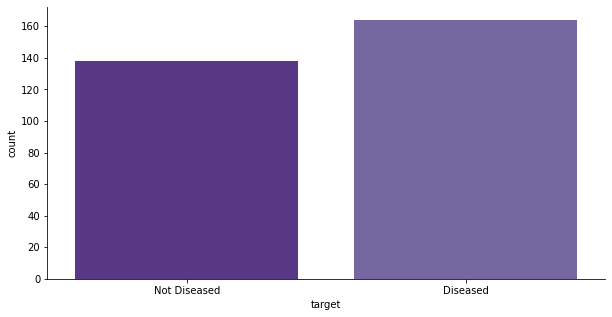

In [141]:
figure, ax = plt.subplots(figsize=(10,5))
sns.countplot(ax=ax, x=df["target"], label=["Not Diseased", "Diseased"])
ax.set_xticklabels(["Not Diseased", "Diseased"])
sns.despine()
plt.show()

In [142]:
num_no_disease = len(df[df["target"] == 0])
num_disease = len(df[df["target"] == 1])
num_rows = len(df)
print(f"Proportion of Not Diseased (target = 0): {num_no_disease * 100 / num_rows:.3f}%")
print(f"Proportion of Diseased (target = 1): {num_disease * 100 / num_rows:.3f}%")

Proportion of Not Diseased (target = 0): 45.695%
Proportion of Diseased (target = 1): 54.305%


In [143]:
df.describe()

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


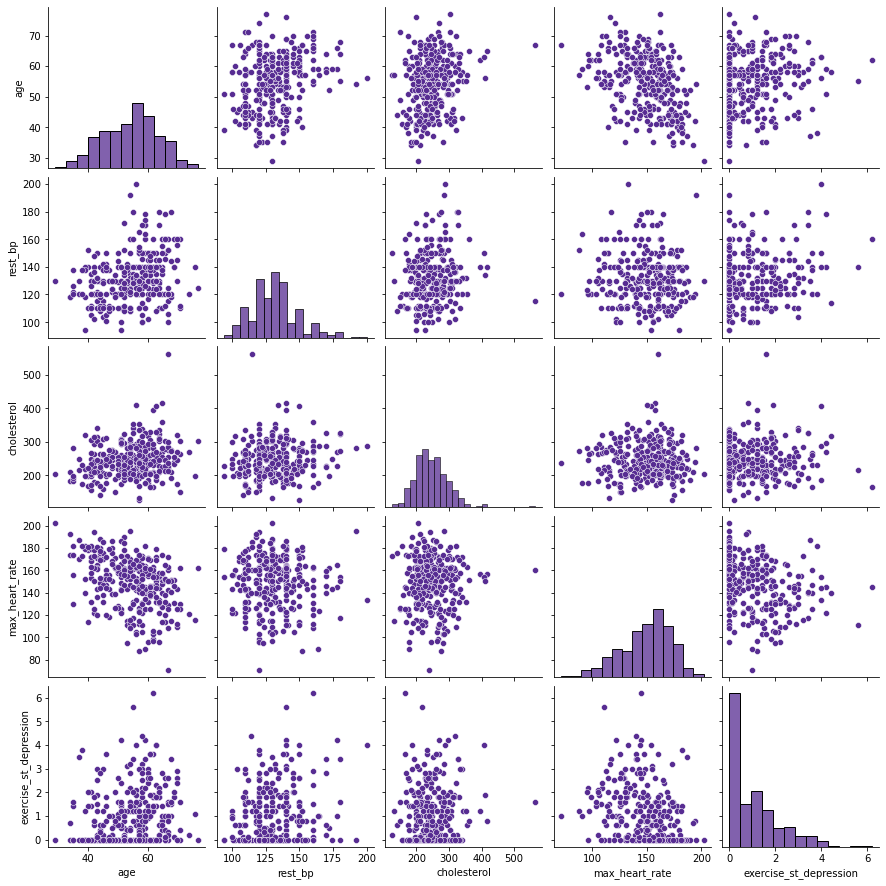

In [159]:
sns.pairplot(df[["age", "rest_bp", "cholesterol", "max_heart_rate", "exercise_st_depression"]])
sns.despine();

Looking at the scatterplots, it seems as though there are no obvious correlations between the different variables except for "max_heart_rate" and "age" which seems to have a weak negative linear correlation. Also, `exercise_st_depression` does not seem to be normally distributed.


In [145]:
# cross tab of age and target
ct = pd.crosstab(df["age"], df["target"])

# create a plotly graph object to compare age with heart disease
fig = go.Figure(data=[
    go.Bar(name='Not Diseased', x=ct.index,
           y=ct[0], text=ct[0], textposition="outside"),
    go.Bar(name='Diseased', x=ct.index,
           y=ct[1], text=ct[1], textposition="outside")
])
fig.update_layout(barmode='group',
                  colorway=["green", "#650086"],
                  height=600,
                  title={"text": "Distribution of Age and Heart Disease",
                         "x": 0.5,
                         "xanchor": "center"},
                  xaxis_title="Age",
                  yaxis_title="Count",
                  legend_title="Legend")
fig.update_xaxes(nticks=30)

fig.show()

In [146]:
# cross tab of sex and target
ct = pd.crosstab(df["sex"], df["target"]).rename(
    {0: "Female", 1: "Male"}, axis=0)

# create a plotly graph object to compare sex with heart disease
fig = go.Figure(data=[
    go.Bar(name='Not Diseased', x=ct.index,
           y=ct[0], text=ct[0], textposition="outside"),
    go.Bar(name='Diseased', x=ct.index,
           y=ct[1], text=ct[1], textposition="outside")
])
fig.update_layout(barmode='group',
                  colorway=["green", "#650086"],
                  title={"text": "Effect of Sex on Heart Disease",
                         "x": 0.5,
                         "xanchor": "center"},
                  xaxis_title="Sex",
                  yaxis_title="Count",
                  legend_title="Legend",
                  )

fig.show()

We see that in the age range of around 41 - 54, the proportion of people with heart disease seems greater than those without but in the age range of 55 -  67, the opposite seems true where the proportion of people without heart disease is greater. Also, when we compare the sex and heart disease, the proportion of females with heart disease is equal to $\frac{72}{24+72}=75\%$ while the proportion of males with heart disease is $\frac{92}{114+92}\approx44.66\%$. 

These may indicate some sort of correlation, however, I'm a bit skeptical as it may just be due the how the data was collected and what data was collected.

In [147]:
from typing import Union
def plot_bar_graph(column_name: str) -> None:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.boxplot(ax=ax, x=df[column_name])
    sns.despine()
    plt.show()

def find_outliers(column_name: str) -> pd.DataFrame:
    lower_quartile = df[column_name].quantile(0.25)
    upper_quartile = df[column_name].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    return df.loc[(df[column_name] > upper_quartile + iqr * 1.5) | (df[column_name] < lower_quartile - iqr * 1.5)]

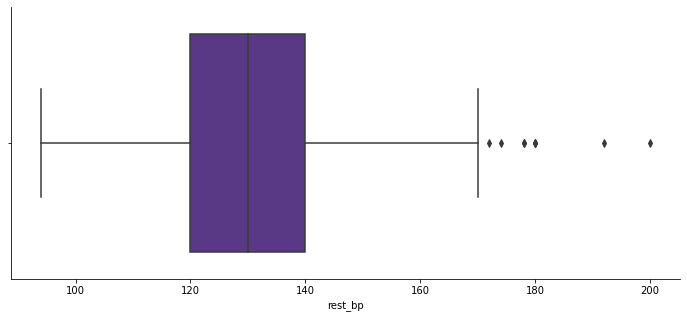

In [148]:
# Check possible outliers on the resting blood pressure
plot_bar_graph("rest_bp")

In [149]:
find_outliers("rest_bp")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,0


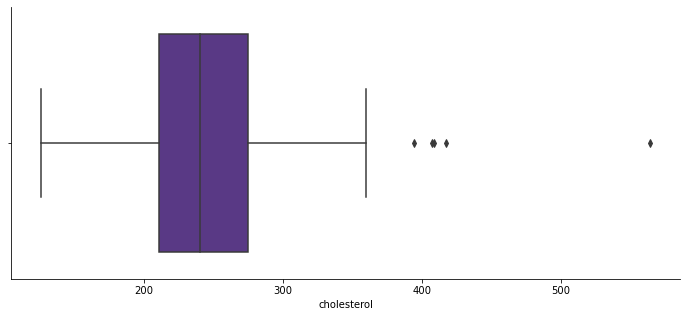

In [150]:
plot_bar_graph("cholesterol")

In [151]:
find_outliers("cholesterol")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,0


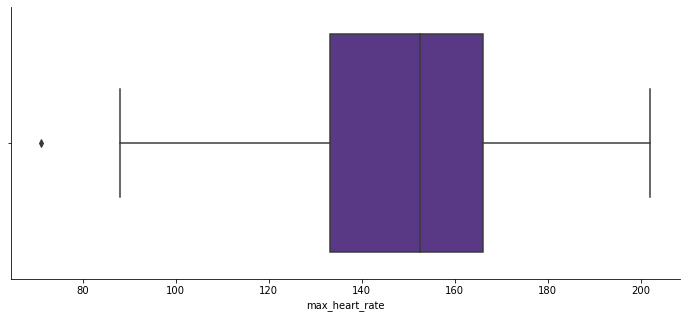

In [152]:
plot_bar_graph("max_heart_rate")

In [153]:
find_outliers("max_heart_rate")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,0


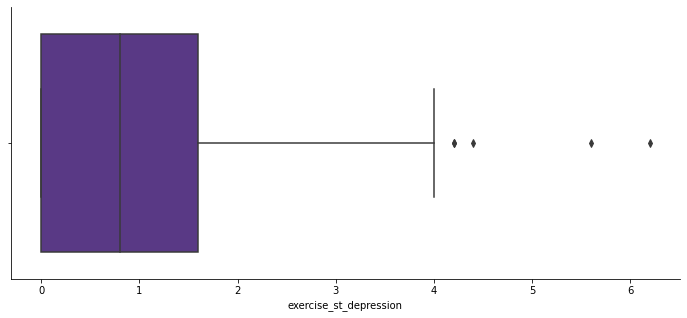

In [161]:
plot_bar_graph("exercise_st_depression")

In [162]:
find_outliers("exercise_st_depression")

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,0


In [160]:
# Find the point biserial correlation coefficient of the continuous variables and the target variable

from scipy.stats import pointbiserialr

correlations = []
p_values = []
for column in ["age", "rest_bp", "cholesterol", "max_heart_rate", "exercise_st_depression"]:
    corr, p = pointbiserialr(df["target"], df[column])
    correlations.append(corr)
    p_values.append(p)
corrs = pd.DataFrame({"Column": ["age", "rest_bp", "cholesterol", "max_heart_rate", "exercise_st_depression"], "Correlation Coefficient": correlations, "P-Value":p_values})
corrs.sort_values("Correlation Coefficient", inplace=True)
corrs.reset_index(drop=True)
corrs

,Column,Correlation Coefficient,P-Value
4,exercise_st_depression,-0.429146,5.814567e-15
0,age,-0.221476,1.039484e-04
1,rest_bp,-0.146269,1.092654e-02
2,cholesterol,-0.081437,1.580370e-01
3,max_heart_rate,0.419955,2.476146e-14


It seems that none of the continuous features are highly correlated with heart disease.

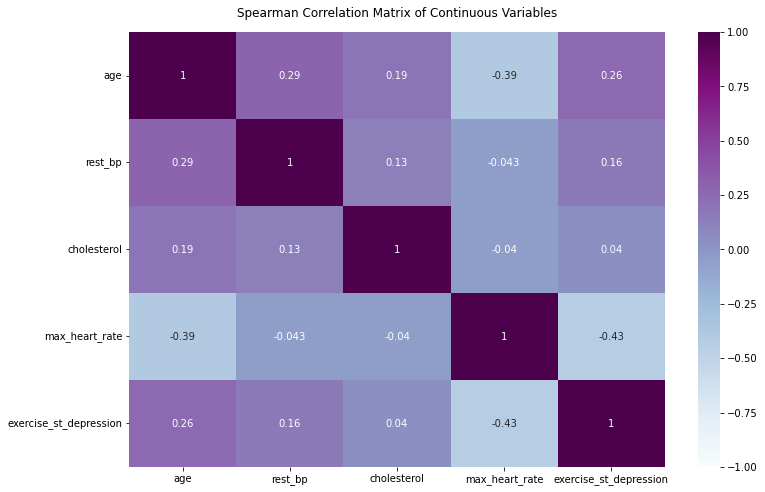

In [157]:
# Find and plot the spearman correlation of the continuous variables 

corr_matrix = df.loc[:, ["age", "rest_bp", "cholesterol", "max_heart_rate", "exercise_st_depression"]].corr(method="spearman")
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ax=ax, data=corr_matrix, cmap="BuPu", vmin=-1, vmax=1, annot=True)
ax.set_title("Spearman Correlation Matrix of Continuous Variables", pad=15)
plt.show()

We also see that the continuous variables are not highly correlated with each other.